In [1]:
car_data = r'D:\Machine-Learning_DS\Chapter 02\06. Trees\car.data'

In [2]:
import pandas as pd

df = pd.read_csv(car_data, header = None)

In [3]:
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [4]:
df = pd.read_csv(car_data, names=columns)

In [5]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [6]:
df.isnull()

,buying,maint,doors,persons,lug_boot,safety,class
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1723,False,False,False,False,False,False,False
1724,False,False,False,False,False,False,False
1725,False,False,False,False,False,False,False
1726,False,False,False,False,False,False,False


In [7]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [9]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1178,med,med,5more,4,big,high
585,high,high,3,more,small,low
1552,low,med,3,4,med,med
1169,med,med,5more,2,big,high
1033,med,high,4,2,big,med


In [10]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [11]:
# from sklearn.preprocessing import OneHotEncoder

# ohe = OneHotEncoder()

# X_train = ohe.fit_transform(X_train)
# X_test = ohe.transform(X_test)

In [12]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

X_train = oe.fit_transform(X_train)
X_test = oe.transform(X_test)

In [13]:
X_train

array([[2., 2., 3., 1., 0., 0.],
       [0., 0., 1., 2., 2., 1.],
       [1., 2., 1., 1., 1., 2.],
       ...,
       [0., 1., 3., 2., 1., 0.],
       [1., 0., 2., 0., 2., 2.],
       [2., 2., 1., 2., 2., 2.]])

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
clf_gini = DecisionTreeClassifier(criterion = 'gini', max_depth= 3, random_state=0)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [16]:
y_pred_gini = clf_gini.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred_gini)

score

0.7572254335260116

[Text(251.10000000000002, 380.52, 'X[3] <= 0.5\ngini = 0.452\nsamples = 1209\nvalue = [266, 50, 852, 41]'),
 Text(167.4, 271.8, 'gini = 0.0\nsamples = 393\nvalue = [0, 0, 393, 0]'),
 Text(334.8, 271.8, 'X[5] <= 0.5\ngini = 0.571\nsamples = 816\nvalue = [266, 50, 459, 41]'),
 Text(167.4, 163.07999999999998, 'X[1] <= 2.5\ngini = 0.627\nsamples = 273\nvalue = [147, 21, 64, 41]'),
 Text(83.7, 54.360000000000014, 'gini = 0.613\nsamples = 202\nvalue = [114, 21, 26, 41]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.498\nsamples = 71\nvalue = [33, 0, 38, 0]'),
 Text(502.20000000000005, 163.07999999999998, 'X[5] <= 1.5\ngini = 0.42\nsamples = 543\nvalue = [119, 29, 395, 0]'),
 Text(418.5, 54.360000000000014, 'gini = 0.0\nsamples = 274\nvalue = [0, 0, 274, 0]'),
 Text(585.9, 54.360000000000014, 'gini = 0.59\nsamples = 269\nvalue = [119, 29, 121, 0]')]

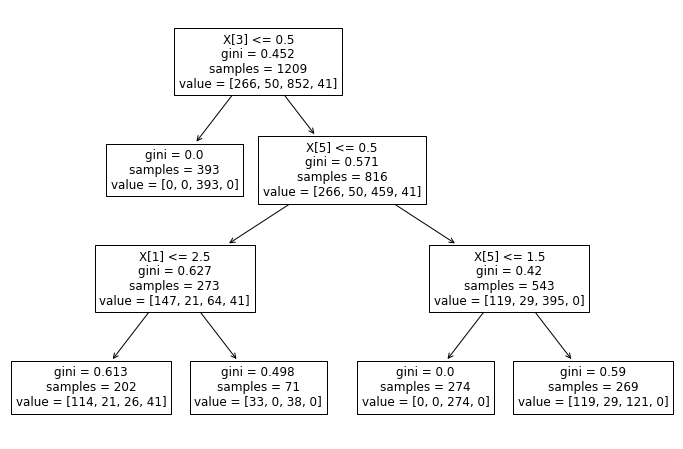

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [19]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [20]:
y_pred_en = clf_en.predict(X_test)

In [21]:
score_en = accuracy_score(y_test, y_pred_en)
score_en

0.7572254335260116

[Text(251.10000000000002, 380.52, 'X[3] <= 0.5\nentropy = 1.192\nsamples = 1209\nvalue = [266, 50, 852, 41]'),
 Text(167.4, 271.8, 'entropy = 0.0\nsamples = 393\nvalue = [0, 0, 393, 0]'),
 Text(334.8, 271.8, 'X[5] <= 0.5\nentropy = 1.458\nsamples = 816\nvalue = [266, 50, 459, 41]'),
 Text(167.4, 163.07999999999998, 'X[1] <= 2.5\nentropy = 1.667\nsamples = 273\nvalue = [147, 21, 64, 41]'),
 Text(83.7, 54.360000000000014, 'entropy = 1.653\nsamples = 202\nvalue = [114, 21, 26, 41]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.996\nsamples = 71\nvalue = [33, 0, 38, 0]'),
 Text(502.20000000000005, 163.07999999999998, 'X[5] <= 1.5\nentropy = 1.04\nsamples = 543\nvalue = [119, 29, 395, 0]'),
 Text(418.5, 54.360000000000014, 'entropy = 0.0\nsamples = 274\nvalue = [0, 0, 274, 0]'),
 Text(585.9, 54.360000000000014, 'entropy = 1.385\nsamples = 269\nvalue = [119, 29, 121, 0]')]

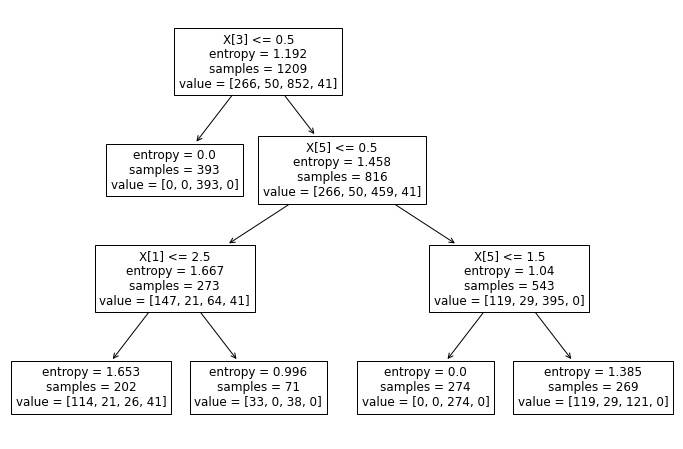

In [22]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

In [23]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 44   0  74   0]
 [  9   0  10   0]
 [  9   0 349   0]
 [ 24   0   0   0]]
